In [1]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Building CNN Model:

In [4]:
tensorflow.test.is_gpu_available()

True

In [5]:
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
labels = os.listdir("../input/drowsiness-dataset/train")

In [7]:
labels

['Closed', 'Open', 'yawn', 'no_yawn']

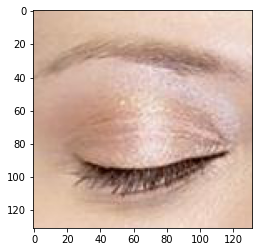

In [8]:
plt.imshow(plt.imread("../input/drowsiness-dataset/train/Closed/_2.jpg"))

In [9]:
a = plt.imread("../input/drowsiness-dataset/train/yawn/10.jpg")

In [10]:
a

array([[[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [157, 165, 178],
        [156, 164, 177],
        [156, 164, 177]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [155, 163, 176],
        [155, 163, 176],
        [155, 163, 176]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [154, 162, 175],
        [154, 162, 175],
        [155, 163, 176]]

In [11]:
a.shape

(480, 640, 3)

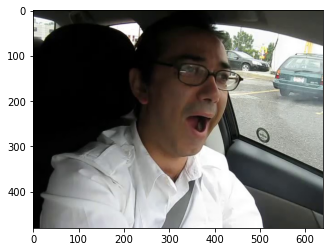

In [12]:
plt.imshow(plt.imread("../input/drowsiness-dataset/train/yawn/120.jpg"))

In [13]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

In [14]:
train_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2321 images belonging to 4 classes.


In [15]:
validation_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 579 images belonging to 4 classes.


In [16]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [17]:
test_data = test_data_gen.flow_from_directory("../input/drowsiness-dataset/train",
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [18]:
train_data

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [20]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [21]:
model.build(input_shape=(80, 80, 3))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          1

In [23]:
validation_steps = len(test_data)
validation_steps

363

In [ ]:
hist = model.fit(train_data, epochs=5, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/5


In [ ]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

In [ ]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
model.save("drowiness1.h5")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('drowiness1.h5')


In [ ]:
import numpy as np

# Assuming model is your trained Sequential model
y_probabilities = model.predict(test_data )
y_pred = np.argmax(y_probabilities, axis=1)

In [ ]:
y_pred 

In [ ]:
labels_new = ["Closed", "Open"]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(test_data, axis=1), y_pred, target_names=labels_new))

In [ ]:
labels_new = ["Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new1.h5")

In [ ]:
#0-yawn, 1-no_yawn, 2-Closed, 3-Open
y_pred= model.predict([prepare("../input/drowsiness-dataset/train/no_yawn/1067.jpg")])
np.argmax(y_pred)

In [ ]:
y_pred = model.predict([prepare("../input/drowsiness-dataset/train/Closed/_101.jpg")])
np.argmax(y_pred)

In [ ]:
y_pred= model.predict([prepare("../input/drowsiness-dataset/train/Open/_104.jpg")])
np.argmax(y_pred)

In [ ]:
y_pred = model.predict([prepare("../input/drowsiness-dataset/train/yawn/113.jpg")])
np.argmax(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(model, X, y):
    # Make predictions using the model
    y_pred = model.predict(X)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    # Calculate ROC-AUC score (if your model outputs probabilities)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X)[:, 1]  # Assuming binary classification
        roc_auc = roc_auc_score(y, y_probabilities)
    else:
        roc_auc = None

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()

    # Create a dictionary to store the results
    evaluation_results = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "True Positives": tp,
        "True Negatives": tn,
        "False Positives": fp,
        "False Negatives": fn,
    }
    

    return evaluation_results
evaluation_results = evaluate_model(model, X, y)
print("Evaluation Results:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have predictions and true labels for each dataset
# Replace 'y_train_pred', 'y_train_true', 'y_test_pred', 'y_test_true', 'y_val_pred', 'y_val_true' with your actual variables

# Training dataset metrics
train_accuracy = accuracy_score(y_train_true, y_train_pred)
train_precision = precision_score(y_train_true, y_train_pred)
train_recall = recall_score(y_train_true, y_train_pred)
train_f1 = f1_score(y_train_true, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train_true, y_train_pred)

# Testing dataset metrics
test_accuracy = accuracy_score(y_test_true, y_test_pred)
test_precision = precision_score(y_test_true, y_test_pred)
test_recall = recall_score(y_test_true, y_test_pred)
test_f1 = f1_score(y_test_true, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test_true, y_test_pred)

# Validation dataset metrics
val_accuracy = accuracy_score(y_val_true, y_val_pred)
val_precision = precision_score(y_val_true, y_val_pred)
val_recall = recall_score(y_val_true, y_val_pred)
val_f1 = f1_score(y_val_true, y_val_pred)
val_confusion_matrix = confusion_matrix(y_val_true, y_val_pred)

# Print or display the metrics for each dataset
print("Training Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1-Score: {train_f1}")
print("Confusion Matrix:")
print(train_confusion_matrix)

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1-Score: {test_f1}")
print("Confusion Matrix:")
print(test_confusion_matrix)

print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {val_precision}")
print(f"Recall: {val_recall}")
print(f"F1-Score: {val_f1}")
print("Confusion Matrix:")
print(val_confusion_matrix)
